## Import patients data (viability and concentration)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# upload here patientsPBMCDataViability.tsv

Saving patientsPBMCDataViability.tsv to patientsPBMCDataViability.tsv


In [2]:
viability = np.genfromtxt("patientsPBMCDataViability.tsv", delimiter='\t', names=True)

In [3]:
uploaded = files.upload()
# upload here patientsPBMCDataConcentration.tsv

Saving patientsPBMCDataConcentration.tsv to patientsPBMCDataConcentration.tsv


In [4]:
concentration = np.genfromtxt("patientsPBMCDataConcentration.tsv", delimiter='\t', names=True)

## Plot patients data independently

[]

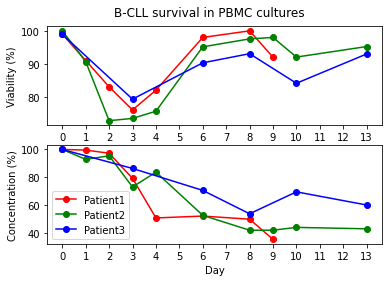

In [5]:
# Plot the data as line plot
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')
fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL survival in PBMC cultures', fontsize=12, y=0.95)

axs[0].set_xticks(range(0,14))
patient1mask = np.isfinite(viability['Patient1'])
patient2mask = np.isfinite(viability['Patient2'])
patient3mask = np.isfinite(viability['Patient3'])
axs[0].plot (viability['Day'][patient1mask], viability['Patient1'][patient1mask], linestyle='-', marker='o', color='r')
axs[0].plot (viability['Day'][patient2mask], viability['Patient2'][patient2mask], linestyle='-', marker='o', color='g')  
axs[0].plot (viability['Day'][patient3mask], viability['Patient3'][patient3mask], linestyle='-', marker='o', color='b')  
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Viability (%)')

axs[1].set_xticks(range(0,14))
patient1maskc = np.isfinite(concentration['Patient1'])
patient2maskc = np.isfinite(concentration['Patient2'])
patient3maskc = np.isfinite(concentration['Patient3'])
axs[1].plot (concentration['Time'][patient1maskc], concentration['Patient1'][patient1maskc], linestyle='-', marker='o', color='r')
axs[1].plot (concentration['Time'][patient2maskc], concentration['Patient2'][patient2maskc], linestyle='-', marker='o', color='g')  
axs[1].plot (concentration['Time'][patient3maskc], concentration['Patient3'][patient3maskc], linestyle='-', marker='o', color='b') 
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend(['Patient1','Patient2','Patient3'])

plt.plot()


## Plot patients data averaged with error bars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


[]

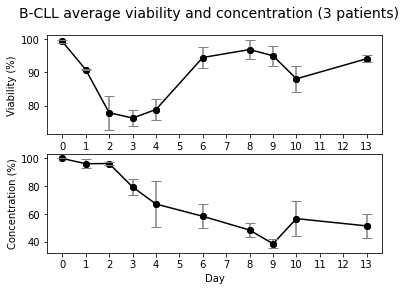

In [8]:
# build the means/std arrays, ignoring nan values
viability_means, viability_err = [None] * len(viability), [None] * len(viability)
for i in range(0, len(viability)) :  
  if [viability[i][1], viability[i][2], viability[i][3]] == [float("nan"),float("nan"),float("nan")] :
    mean = float("nan")
    std = 0
  else :
    mean = np.nanmean([viability[i][1], viability[i][2], viability[i][3]], dtype=np.float64)
    std = np.nanstd([viability[i][1], viability[i][2], viability[i][3]], dtype=np.float64)
  viability_means[i] = mean
  viability_err[i] = std

concentration_means, concentration_err = [None] * len(concentration), [None] * len(concentration)
for i in range(0, len(concentration)) :
  if [concentration[i][1], concentration[i][2], concentration[i][3]] == [float("nan"),float("nan"),float("nan")] :
    mean = float("nan")
    std = 0
  else :
    mean = np.nanmean([concentration[i][1], concentration[i][2], concentration[i][3]], dtype=np.float64)
    std = np.nanstd([concentration[i][1], concentration[i][2], concentration[i][3]], dtype=np.float64)
  concentration_means[i] = mean
  concentration_err[i] = std

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL average viability and concentration (3 patients)', fontsize=14)

viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)

axs[0].set_xticks(range(0,14))
axs[0].plot (viability['Day'][viability_mask], viability_means_array[viability_mask], linestyle='-', marker='o', color='black')
axs[0].scatter (viability['Day'][viability_mask], viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axs[0].errorbar(viability['Day'], viability_means_array, viability_err, ecolor = 'grey', fmt='none', capsize = 5)
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Viability (%)')

concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)

axs[1].set_xticks(range(0,14))
axs[1].plot (concentration['Time'][concentration_mask], concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black')
axs[1].scatter (concentration['Time'][concentration_mask], concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axs[1].errorbar(concentration['Time'], concentration_means, concentration_err, ecolor = 'grey', fmt='none', capsize = 5)
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Concentration (%)')

plt.plot()


## Pareto front

### Plot pareto front

In [9]:
## Build the pareto front from exploration outputs obtained through NSGA2 in Openmole 
## import NSGA2 exploration output
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving outputs_ABM_eqFit_1_duplicates_removed_filtered_only_samples_kept_100.0.txt to outputs_ABM_eqFit_1_duplicates_removed_filtered_only_samples_kept_100.0.txt


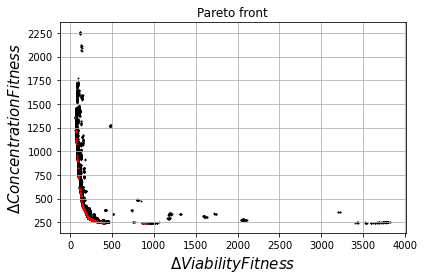

[(62.073022890657064, 1359.2492544837, [10, 6, 1, 38, 1, 9, 10, 0, 3, 1, 1, 3, 138, 56, 8, 89, 14]), (63.66622903364843, 1223.3714204837, [10, 9, 1, 49, 1, 8, 9, 0, 3, 1, 1, 3, 138, 56, 8, 89, 18]), (67.41332659038392, 1212.2493514837, [10, 9, 1, 50, 1, 9, 9, 0, 3, 1, 1, 3, 138, 56, 8, 89, 18]), (67.88882586190098, 1208.0510214837002, [10, 9, 1, 49, 1, 8, 9, 0, 3, 1, 1, 3, 138, 56, 8, 89, 18]), (68.46661657471029, 1144.9048884837002, [10, 9, 1, 38, 1, 10, 8, 0, 3, 1, 1, 3, 138, 56, 11, 88, 19]), (71.91573161115379, 1116.5792424837, [10, 9, 1, 49, 1, 8, 9, 0, 3, 1, 1, 3, 132, 56, 24, 89, 18]), (72.02808660585849, 1112.3078254836998, [10, 9, 1, 49, 1, 8, 9, 0, 3, 1, 1, 3, 132, 56, 24, 89, 18]), (72.67907837379136, 1111.6807674837005, [10, 10, 1, 38, 1, 9, 8, 0, 3, 1, 1, 3, 138, 56, 8, 89, 23]), (73.71845605237853, 1106.4190264837002, [10, 10, 1, 38, 1, 9, 8, 0, 3, 1, 1, 3, 138, 56, 8, 89, 23]), (76.31813566565972, 1085.3429754837002, [10, 9, 1, 49, 1, 8, 9, 0, 3, 1, 1, 3, 132, 56, 24, 89

In [20]:
## load data and extract pareto front
import math
exploration_output = "outputs_ABM_eqFit_1_duplicates_removed_filtered_for_samples_min_100.txt"
with open(exploration_output, 'r') as file_read :
  my_points = []
  data = file_read.readlines()
  for line in data[1:] :
    line = line.replace("\n","").split(",")
    apo = int(line[0])
    needSig = int(line[1])
    layers = int(line[2])
    alpha = int(line[3])
    monoPhago = int(line[4])
    NLCPhago = int(line[5])
    M2Phago = int(line[6])
    M2Kill = int(line[7])
    cllDist = int(line[8])
    MonoDist = int(line[9])
    nlcDist = int(line[10])
    macroDist = int(line[11])
    nlcThreshold = int(line[12])
    signalInitMean = int(line[13])
    signalInitStd = int(line[14])
    diffTime = int(line[15])
    diffInitStd = int(line[16])
    delta_fitness_via = float(line[17])
    delta_fitness_conc = float(line[18])
    euclid = math.sqrt(delta_fitness_via*delta_fitness_via + delta_fitness_conc * delta_fitness_conc)
    my_points.append([delta_fitness_via,delta_fitness_conc, euclid, 1, 
			apo, needSig, layers, alpha, 
			monoPhago, NLCPhago, M2Phago, M2Kill, 
			cllDist, MonoDist, nlcDist, macroDist, nlcThreshold, signalInitMean, signalInitStd,
			diffTime, diffInitStd])

b_set = set(tuple(x) for x in my_points)
my_points_singles = [ list(x) for x in b_set ]
my_points_sorted = sorted(my_points_singles, key=lambda x: x[2])

for i in range(0, len(my_points_sorted)) :
	x1 = my_points_sorted[i][0]
	y1 = my_points_sorted[i][1]

	for j in range(0, len(my_points_sorted)) :
		x2 = my_points_sorted[j][0]
		y2 = my_points_sorted[j][1]
		if not ((x1 == x2) and (y1 == y2)) :
			if (x2 <= x1) and (y2 <= y1) :
				my_points_sorted[i][3] = 0
				break

pareto_front = []
for point in my_points_sorted :
	if point[3] == 1 :
		pareto_front.append((point[0],point[1], point[4:]))

fig, ax = plt.subplots()

x_val = [x[0] for x in my_points_sorted]
y_val = [x[1] for x in my_points_sorted]
x_val_pareto = [x[0] for x in pareto_front]
y_val_pareto = [x[1] for x in pareto_front]

plt.scatter(x_val, y_val,color='black',s=0.75)
plt.scatter(x_val_pareto, y_val_pareto,color='red',s=0.75)
ax.set_xlabel(r'$\Delta Viability Fitness$', fontsize=15)
ax.set_ylabel(r'$\Delta ConcentrationFitness$', fontsize=15)
ax.set_title('Pareto front')
ax.grid(True)
plt.tight_layout()
plt.show()

In [24]:
#print pareto front parameter sets
pareto_front_sorted = sorted(pareto_front, key=lambda x: x[0])
print(pareto_front_sorted)

with open("pareto_front.txt", 'a+') as file_write :
	file_write.write("delta_fitness_via,delta_fitness_conc, apo, needSig, layers, alpha, monoPhago, NLCPhago, MPhago, MKill, cllDist, MonoDist, nlcDist, macroDist, nlcThreshold, signalInitMean, signalInitStd, diffTime, diffInitStd\n")
	for sets in pareto_front_sorted :
		line = (",".join(str(x) for x in sets)).replace("[","").replace("]","")
		file_write.write(line)
		file_write.write("\n")

files.download("pareto_front.txt") 

[(62.07302289, 1359.24925448, 10., 6., 1., 38., 1., 9., 10., 0., 3., 1., 1., 3., 138., 56., 8., 89., 14.), (63.66622903, 1223.37142048, 10., 9., 1., 49., 1., 8., 9., 0., 3., 1., 1., 3., 138., 56., 8., 89., 18.), (67.41332659, 1212.24935148, 10., 9., 1., 50., 1., 9., 9., 0., 3., 1., 1., 3., 138., 56., 8., 89., 18.), (67.88882586, 1208.05102148, 10., 9., 1., 49., 1., 8., 9., 0., 3., 1., 1., 3., 138., 56., 8., 89., 18.), (68.46661657, 1144.90488848, 10., 9., 1., 38., 1., 10., 8., 0., 3., 1., 1., 3., 138., 56., 11., 88., 19.), (71.91573161, 1116.57924248, 10., 9., 1., 49., 1., 8., 9., 0., 3., 1., 1., 3., 132., 56., 24., 89., 18.), (72.02808661, 1112.30782548, 10., 9., 1., 49., 1., 8., 9., 0., 3., 1., 1., 3., 132., 56., 24., 89., 18.), (72.67907837, 1111.68076748, 10., 10., 1., 38., 1., 9., 8., 0., 3., 1., 1., 3., 138., 56., 8., 89., 23.), (73.71845605, 1106.41902648, 10., 10., 1., 38., 1., 9., 8., 0., 3., 1., 1., 3., 138., 56., 8., 89., 23.), (76.31813567, 1085.34297548, 10., 9., 1., 49., 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Compute the knee-point parameters set using the utopian method

In [23]:
pareto_front = np.genfromtxt("pareto_front.txt", delimiter=',', names=True)
# print(pareto_front)
## compute euclidian distance to (0,0)
# extract the delta fitnesses
import math
my_distances = []
my_param_dict = {}
for param_set in pareto_front :
  delta_via = param_set[0]
  delta_conc = param_set[1]
  distance = math.sqrt(delta_via*delta_via + delta_conc*delta_conc)
  my_distances.append(distance)
  if distance not in my_param_dict :
    my_param_dict[distance] = param_set
  else :
    print("equivalent distance found")
print(my_distances)
# extract the min distance to get the closest to the utopian point
utopian_point = min(my_distances)
# print(best_params)
print("Min distance to utopia point is: ", utopian_point)
print("Corresponding parameters are: ", my_param_dict[utopian_point])

[1360.6658649298433, 1225.0269471222543, 1214.1223360002207, 1209.957091464288, 1146.9502523035, 1118.8927907528232, 1114.6374943865733, 1114.0540279656157, 1108.8721625723524, 1088.0229006152829, 1082.956174206868, 960.9616697718383, 954.3464742935184, 934.0700422436896, 922.7129386423865, 907.5701211454004, 906.4074180591623, 896.7920465171661, 832.4843929824418, 826.5669574912222, 746.0844743574489, 739.7277206110107, 739.1506768187049, 730.7860942621237, 724.8830861058517, 622.3539439418931, 615.9698438907224, 615.2435451574017, 611.450353589734, 608.401893665967, 603.1397826577921, 602.1899904961392, 578.88358679553, 573.6559061330694, 569.2278850369962, 554.9401279065816, 554.9974983425155, 548.837085339535, 547.2770820950501, 546.0943689543145, 543.6761193534572, 502.6283040575748, 491.75305201622587, 491.08047030072186, 473.5548270007441, 455.45963821864314, 455.80252378783075, 455.42978592515465, 452.9752223291549, 451.96962738191445, 447.6483137010764, 445.90088900637585, 441

## Stochasticity analysis
Run the model 100 times in netlogo and save simulations outputs as "table output". To do this, use the BehaviorSpace menu and run the "Explo-stochasticity-100-simulations" experiment.

### Load Data

In [25]:
## import simulations results with a set of optimized parameters
uploaded = files.upload()

Saving stocha_best_via.csv to stocha_best_via.csv


[99.31578667 90.82967    77.863635   76.23162333 78.80488            nan
 94.48138            nan 96.87676    95.         88.065455           nan
         nan 94.110275  ]
Mean Delta Fitness Via for stocha_best_via = 43.107763404317595
Mean Delta Fitness Conc for stocha_best_via = 1279.5338660077514
The median fitness on viability over all simulations for stocha_best_via is : 49.26510638359521
The median fitness on concentration over all simulations for stocha_best_via is : 1282.1300523111925


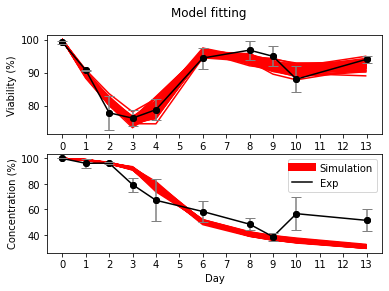

In [28]:
## plot simulations vs experimental data
import numpy
file_name = "stocha_best_via"
n_repetitions = 100
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')
# set_matplotlib_formats('pdf')

viability_dict, remaining_dict= {}, {}
with open("%s.csv" % file_name, 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

my_list = [0,24,24*2,24*3,24*4,24*6,24*8,24*9,24*10,311]

df_viability = pd.DataFrame.from_dict(viability_dict)
df_remaining = pd.DataFrame.from_dict(remaining_dict)
filtered_df_viability = df_viability[df_viability.index.isin(my_list)]
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Model fitting', fontsize=12)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)#, ylim=(00,100), color='orange')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))

filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)#, ylim=(00,110), color='orange')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))

# ### add the mean experimental
viability = np.genfromtxt("patientsPBMCDataViability.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_means_array_for_fitness = viability_means_array[~numpy.isnan(viability_means_array)]

viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length' )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'grey', fmt='none', capsize = 5)

concentration = np.genfromtxt("patientsPBMCDataConcentration.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_means_array_for_fitness = concentration_means_array[~numpy.isnan(concentration_means_array)]

concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp')
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'grey', fmt='none', capsize = 5)

# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Exp'])#, loc='upper right', bbox_to_anchor=(1.3,1.3), )


LH = leg.legendHandles
LH[0].set_linewidth(8)
LH[1].set_color('black') 
plt.plot()

## calculate the mean values from several simulations for viability
mean_via_simu = filtered_df_viability.mean(axis=1).transpose()
mean_via_exp = pd.DataFrame(data=viability_means_array_for_fitness, index=mean_via_simu.index).transpose()
via_errors = (mean_via_simu - mean_via_exp).transpose()
via_errors2 = via_errors * via_errors
sum_via_errors = via_errors2[0].sum()
print("Mean Delta Fitness Via for %s = %s" % (file_name,sum_via_errors))

## calculate the mean values from several simulations for concentration
mean_conc_simu = filtered_df_remaining.mean(axis=1).transpose()
mean_conc_exp = pd.DataFrame(data=concentration_means_array_for_fitness, index=mean_conc_simu.index).transpose()
conc_errors = (mean_conc_simu - mean_conc_exp).transpose()
conc_errors2 = conc_errors * conc_errors
sum_conc_errors = conc_errors2[0].sum()
print("Mean Delta Fitness Conc for %s = %s" % (file_name,sum_conc_errors))

### calculate for each simulation the sum of the squared errors for viability and extract the median value
vector_array_via = np.array([viability_means_array_for_fitness] * n_repetitions).T
vector_df_via = pd.DataFrame(vector_array_via, index=mean_via_simu.index)
vector_df_via.columns = np.arange(1,n_repetitions+1)
errors_via = (filtered_df_viability - vector_df_via)
errors_squared_via = errors_via ** 2
sum_errors_squared_via = errors_squared_via.sum(axis=0, skipna = True)
print("The median fitness on viability over all simulations for %s is : %s" % (file_name, sum_errors_squared_via.median(skipna = True)))

# ### calculate for each simulation the sum of the squared errors for concentration and extract the median value
vector_array_conc = np.array([concentration_means_array_for_fitness] * n_repetitions).T
vector_df_conc = pd.DataFrame(vector_array_conc, index=mean_conc_simu.index)
vector_df_conc.columns = np.arange(1,n_repetitions + 1)
errors_conc = (filtered_df_remaining - vector_df_conc)
errors_squared_conc = errors_conc ** 2
sum_errors_squared_conc = errors_squared_conc.sum(axis=0, skipna = True)
print("The median fitness on concentration over all simulations for %s is : %s" % (file_name, sum_errors_squared_conc.median(skipna = True)))

### Test prediction on dynamics of autologous PBMC cultures for each patient individually

In [29]:
## import simulations results with patient-specific patient initial monocytes proportion
uploaded = files.upload()

Saving pred_patient1.csv to pred_patient1.csv


[]

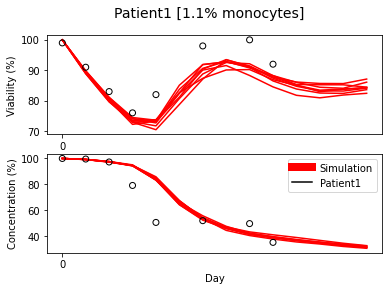

In [31]:
## plot simulations vs experimental data

import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

viability_dict, remaining_dict= {}, {}
with open("pred_patient1.csv", 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

df_viability = pd.DataFrame.from_dict(viability_dict) #  orient='index')
df_remaining = pd.DataFrame.from_dict(remaining_dict)

my_list = [0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8,24*9,24*10,24*11,24*12,24*13]

# filter for points on the same time points than the experimental data (days)
filtered_df_viability = df_viability[df_viability.index.isin(my_list)]

# change indexes to day number instead of hours, to facilitate the x-axis labelling of the patient data
map_index={}
for index in my_list :
  index = float(index)
  map_index[index] = index / 24
for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_viability = filtered_df_viability.rename(index={my_index: mapped_index}) 

# do the same with the simulation concentration matrix
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_remaining = filtered_df_remaining.rename(index={my_index: mapped_index}) 

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Patient1 [1.1% monocytes]', fontsize=14)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)
filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)

# ### add the patient 1 experimental data
viability = np.genfromtxt("patientsPBMCDataViability.tsv", delimiter='\t', names=True)
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
axes[0].scatter (viability['Day'], viability['Patient1'], facecolors ='none', edgecolors='black')

concentration = np.genfromtxt("patientsPBMCDataConcentration.tsv", delimiter='\t', names=True)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
axes[1].scatter (concentration['Time'], concentration['Patient1'], facecolors ='none', edgecolors='black')

# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Patient1'])

LH = leg.legendHandles
LH[0].set_linewidth(8)
LH[1].set_color('black') 
plt.plot()


#### Patient 2

In [ ]:
## import simulations results with best set of optimized parameters
uploaded = files.upload()
# my_file = open(uploaded, 'r')
# file_name = my_file.name
# print(file_name)

Saving pred-LAU-2.5-table.csv to pred-LAU-2.5-table.csv


In [ ]:
## plot simulations vs experimental data

import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('pdf')

viability_dict, remaining_dict= {}, {}
with open("pred-LAU-2.5-table.csv", 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

df_viability = pd.DataFrame.from_dict(viability_dict) #  orient='index')
df_remaining = pd.DataFrame.from_dict(remaining_dict)

my_list = [0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8,24*9,24*10,24*11,24*12,24*13]

# filter for points on the same time points than the experimental data (days)
filtered_df_viability = df_viability[df_viability.index.isin(my_list)]

# change indexes to day number instead of hours, to facilitate the x-axis labelling of the patient data
map_index={}
for index in my_list :
  index = float(index)
  map_index[index] = index / 24
for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_viability = filtered_df_viability.rename(index={my_index: mapped_index}) 
print(filtered_df_viability)

# do the same with the simulation concentration matrix
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_remaining = filtered_df_remaining.rename(index={my_index: mapped_index}) 

print(filtered_df_remaining)

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Patient2 [2.5% monocytes]', fontsize=14)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)#, ylim=(00,100), color='orange')


filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)#, ylim=(00,110), color='orange')


# ### add the patient 1 experimental data
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
axes[0].scatter (viability['Day'], viability['Patient2'], facecolors ='none', edgecolors='black')


concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
axes[1].scatter (concentration['Time'], concentration['Patient2'], facecolors ='none', edgecolors='black')


# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Patient2'])#, loc='upper right', bbox_to_anchor=(1.3,1.3), )


LH = leg.legendHandles
LH[0].set_linewidth(8)  # Works
LH[1].set_color('black') # No change
# LH[2].set_ms(15)    # No change
# LH[3].set_marker('*')  # Stars added to left and right!
# LH[3].set_color('r')   # Stars now change color
# LH[4].set_color('w')   # No change
# LH[5].set_alpha(0.5)  # Well-behaved scatter

# plt.show()


plt.plot()
plt.savefig("pred_patient2.pdf")
files.download("pred_patient2.pdf") 

               4           2           3  ...           6           7           8
0.0   100.000000  100.000000  100.000000  ...  100.000000  100.000000  100.000000
1.0    89.735772   90.077425   90.514076  ...   90.552948   90.028548   90.114146
2.0    81.618887   82.901994   83.552632  ...   83.837529   82.520583   82.500000
3.0    76.769265   78.434505   78.564962  ...   79.147881   78.473932   77.638360
4.0    88.267831   89.711934   89.323221  ...   90.261628   88.216743   85.117057
5.0    97.206096   97.593875   97.719870  ...   97.238938   98.014440   97.422127
6.0    98.349154   97.896907   97.716895  ...   97.797357   97.942719   97.926829
7.0    97.421731   97.359889   98.218472  ...   97.574124   97.790055   97.390494
8.0    96.887967   96.649485   96.514048  ...   96.890672   95.592004   96.229339
9.0    95.564290   95.763657   96.294185  ...   96.272285   95.014006   95.791246
10.0   95.719382   94.444444   95.468098  ...   96.331828   94.768133   95.952381
11.0   96.958411

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 2 Axes>

#### Patient3

In [ ]:
## import simulations results with best set of optimized parameters
uploaded = files.upload()
# my_file = open(uploaded, 'r')
# file_name = my_file.name
# print(file_name)

Saving pred-DES-1.25-table.csv to pred-DES-1.25-table.csv


In [ ]:
## plot simulations vs experimental data

import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('pdf')

viability_dict, remaining_dict= {}, {}
with open("pred-DES-1.25-table.csv", 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

df_viability = pd.DataFrame.from_dict(viability_dict) #  orient='index')
df_remaining = pd.DataFrame.from_dict(remaining_dict)

my_list = [0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8,24*9,24*10,24*11,24*12,24*13]

# filter for points on the same time points than the experimental data (days)
filtered_df_viability = df_viability[df_viability.index.isin(my_list)]

# change indexes to day number instead of hours, to facilitate the x-axis labelling of the patient data
map_index={}
for index in my_list :
  index = float(index)
  map_index[index] = index / 24
for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_viability = filtered_df_viability.rename(index={my_index: mapped_index}) 
print(filtered_df_viability)

# do the same with the simulation concentration matrix
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

for my_index in map_index :
  mapped_index = map_index[my_index]
  filtered_df_remaining = filtered_df_remaining.rename(index={my_index: mapped_index}) 

print(filtered_df_remaining)

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Patient3 [1.25% monocytes]', fontsize=14)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)#, ylim=(00,100), color='orange')


filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)#, ylim=(00,110), color='orange')


# ### add the patient 1 experimental data
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
axes[0].scatter (viability['Day'], viability['Patient3'], facecolors ='none', edgecolors='black')


concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
axes[1].scatter (concentration['Time'], concentration['Patient3'], facecolors ='none', edgecolors='black')


# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Patient3'])#, loc='upper right', bbox_to_anchor=(1.3,1.3), )


LH = leg.legendHandles
LH[0].set_linewidth(8)  # Works
LH[1].set_color('black') # No change
# LH[2].set_ms(15)    # No change
# LH[3].set_marker('*')  # Stars added to left and right!
# LH[3].set_color('r')   # Stars now change color
# LH[4].set_color('w')   # No change
# LH[5].set_alpha(0.5)  # Well-behaved scatter

# plt.show()


plt.plot()
plt.savefig("pred_patient3.pdf")
files.download("pred_patient3.pdf")

               4           1           3  ...           6           7           8
0.0   100.000000  100.000000  100.000000  ...  100.000000  100.000000  100.000000
1.0    90.161616   89.005872   88.638195  ...   90.042502   89.326865   89.294355
2.0    81.908098   80.342763   80.435229  ...   81.534326   80.417701   80.345395
3.0    74.117896   73.731728   73.758715  ...   74.936007   74.043190   73.578452
4.0    74.855908   74.326970   73.217681  ...   74.178854   74.963361   73.480797
5.0    86.895035   85.759796   86.215539  ...   85.302326   87.158909   85.041375
6.0    93.206107   93.706294   93.646515  ...   92.411721   94.230019   92.757009
7.0    94.437201   94.543828   93.656388  ...   94.614711   94.769504   92.579660
8.0    93.668439   92.428712   93.020986  ...   93.493976   92.916872   89.683301
9.0    90.206186   89.276281   90.776446  ...   90.103093   88.795812   88.819553
10.0   87.397709   88.258208   87.657018  ...   88.206253   87.000000   87.576262
11.0   86.964079

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 2 Axes>

## Sensitivity Analysis

### Absence of Phagocytosis

In [ ]:
## import simulations results with best set of optimized parameters
uploaded = files.upload()
# my_file = open(uploaded, 'r')
# file_name = my_file.name
# print(file_name)

Saving Perturb_NoPhago.csv to Perturb_NoPhago.csv


         4        2        1        3    ...      97       98       99       100
0    100.000  100.000  100.000  100.000  ...  100.000  100.000  100.000  100.000
24    88.375   88.925   88.950   88.075  ...   87.900   88.800   88.425   89.025
48    78.325   78.550   79.425   77.550  ...   77.525   78.475   78.175   79.075
72    70.025   69.625   70.875   69.100  ...   69.200   69.600   69.400   70.600
96    61.675   61.800   63.175   61.300  ...   61.475   61.200   61.100   62.250
120   54.225   54.625   55.675   54.000  ...   55.275   54.475   53.600   54.750
144   48.250   48.150   49.950   47.950  ...   49.275   48.525   47.000   48.975
168   43.025   42.700   44.200   42.625  ...   43.700   42.850   42.150   43.475
192   38.950   38.500   39.475   37.975  ...   39.025   38.800   38.025   39.275
216   36.125   35.875   36.525   34.900  ...   35.300   35.700   35.250   36.400
240   34.175   33.800   34.525   32.450  ...   32.950   33.375   33.275   34.375
264   32.675   32.550   33.2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

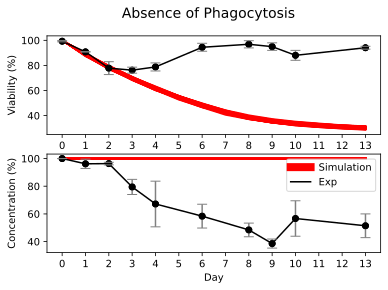

In [ ]:
## plot simulations vs experimental data
file_name = "Perturb_NoPhago"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
# set_matplotlib_formats('png')

viability_dict, remaining_dict= {}, {}
with open("%s.csv" % file_name, 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

df_viability = pd.DataFrame.from_dict(viability_dict) #  orient='index')
df_remaining = pd.DataFrame.from_dict(remaining_dict)

my_list = [0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8,24*9,24*10,24*11,24*12,24*13]

filtered_df_viability = df_viability[df_viability.index.isin(my_list)]
print(filtered_df_viability)
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

#### make separate plots
# filtered_df_viability.plot(title='Viability',legend=False, ylim=(80,100))
# filtered_df_remaining.plot(title='Remaining Cells', legend=False, ylim=(30,110))

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Absence of Phagocytosis', fontsize=14)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)#, ylim=(00,100), color='orange')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))

filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)#, ylim=(00,110), color='orange')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length' )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'grey', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp')
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'grey', fmt='none', capsize = 5)

# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Exp'])#, loc='upper right', bbox_to_anchor=(1.3,1.3), )


LH = leg.legendHandles
LH[0].set_linewidth(8)  # Works
LH[1].set_color('black') # No change
# LH[2].set_ms(15)    # No change
# LH[3].set_marker('*')  # Stars added to left and right!
# LH[3].set_color('r')   # Stars now change color
# LH[4].set_color('w')   # No change
# LH[5].set_alpha(0.5)  # Well-behaved scatter

# plt.show()
plt.plot()

## calculate the mean values from several simulations for viability
mean_via_simu = filtered_df_viability.mean(axis=1).transpose()
# print(mean_via_simu)
mean_via_exp = pd.DataFrame(data=viability_means_array, index=mean_via_simu.index).transpose()
# print(mean_via_exp)
via_errors = (mean_via_simu - mean_via_exp).transpose()
# print(via_errors)
via_errors2 = via_errors * via_errors
# print(via_errors2[0])
sum_via_errors = via_errors2[0].sum()
print("Delta Fitness Via for %s = %s" % (file_name,sum_via_errors))

## calculate the mean values from several simulations for concentration
mean_conc_simu = filtered_df_remaining.mean(axis=1).transpose()
mean_conc_exp = pd.DataFrame(data=concentration_means_array, index=mean_conc_simu.index).transpose()
conc_errors = (mean_conc_simu - mean_conc_exp).transpose()
conc_errors2 = conc_errors * conc_errors
sum_conc_errors = conc_errors2[0].sum()
print("Delta Fitness Conc for %s = %s" % (file_name,sum_conc_errors))

plt.savefig("Perturb_NoPhago.svg")
files.download("Perturb_NoPhago.svg") 

### Macrophage Phagocytosis

In [ ]:
## import simulations results with best set of optimized parameters
uploaded = files.upload()
# my_file = open(uploaded, 'r')
# file_name = my_file.name
# print(file_name)

Saving PerturbM2PhagoEff.csv to PerturbM2PhagoEff.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

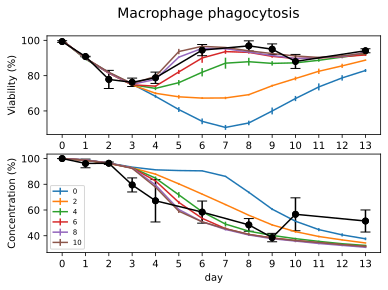

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbM2PhagoEff"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Macrophage phagocytosis', fontsize=14)

groups = df.groupby(['gui-M2-phago-eff', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbM2PhagoEff.svg")
files.download("PerturbM2PhagoEff.svg") 

### Monocyte Phagocytosis

In [ ]:
## import varying mono phago eff
uploaded = files.upload()


Saving PerturbMonoPhagoEff.csv to PerturbMonoPhagoEff.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

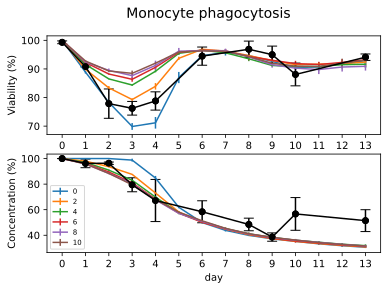

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbMonoPhagoEff"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Monocyte phagocytosis', fontsize=14)

groups = df.groupby(['gui-mono-phago-eff', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbMonoPhagoEff.svg")
files.download("PerturbMonoPhagoEff.svg") 

### NLC Phagocytosis

In [ ]:
## import varying mono phago eff
uploaded = files.upload()

Saving PerturbNLCPhagoEff.csv to PerturbNLCPhagoEff.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

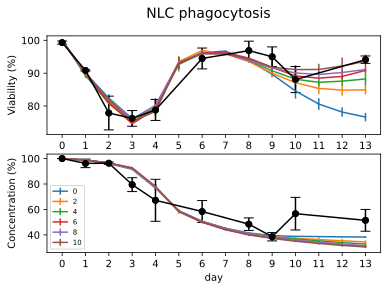

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbNLCPhagoEff"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('NLC phagocytosis', fontsize=14)

groups = df.groupby(['gui-nlc-phago-eff', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbNLCPhagoEff.svg")
files.download("PerturbNLCPhagoEff.svg") 

### AlphaBoost

In [ ]:
## import varying mono phago eff
uploaded = files.upload()

Saving PerturbNoPhagoAndNLCProtection.csv to PerturbNoPhagoAndNLCProtection (2).csv


[]

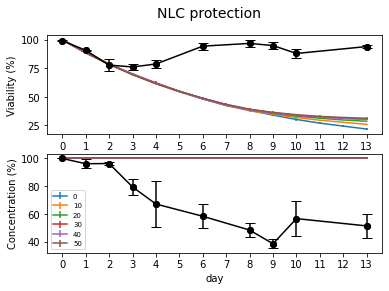

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbNoPhagoAndNLCProtection (2)"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')
# set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('NLC protection', fontsize=14)

groups = df.groupby(['gui-alpha', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
# plt.savefig("PerturbNLCProtection.svg")
# files.download("PerturbNLCProtection.svg") 

### NLC Threshold

In [ ]:
## import varying NLC Threshold
uploaded = files.upload()

Saving PerturbNLCThreshold.csv to PerturbNLCThreshold.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

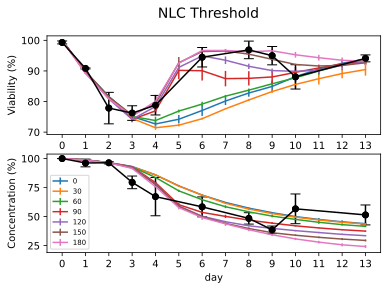

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbNLCThreshold"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('NLC Threshold', fontsize=14)

groups = df.groupby(['gui-nlc-threshold', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbNLCThreshold.svg")
files.download("PerturbNLCThreshold.svg") 

### Differentiation Time

In [ ]:
## import varying Differentiation Time
uploaded = files.upload()

Saving PerturbDiffMean.csv to PerturbDiffMean.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

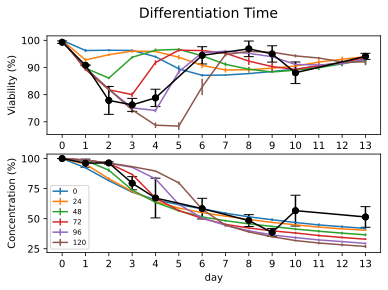

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbDiffMean"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Differentiation Time', fontsize=14)

groups = df.groupby(['gui-diff-mean', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbDiffMean.svg")
files.download("PerturbDiffMean.svg") 

### Differentiation Initial Variance

In [ ]:
## import varying Differentiation Initial Variance
uploaded = files.upload()

Saving PerturbDiffStd.csv to PerturbDiffStd.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

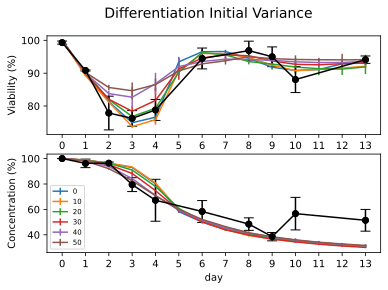

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbDiffStd"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Differentiation Initial Variance', fontsize=14)

groups = df.groupby(['gui-diff-std', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbDiffStd.svg")
files.download("PerturbDiffStd.svg") 

### Signal Mean Init

In [ ]:
## import varying Signal Mean Init
uploaded = files.upload()

Saving PerturbSigInit.csv to PerturbSigInit.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

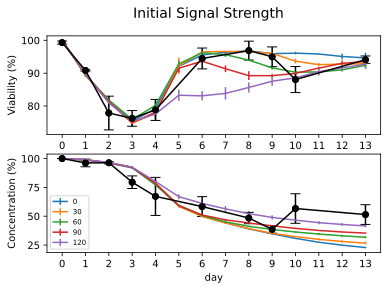

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbSigInit"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Initial Signal Strength', fontsize=14)

groups = df.groupby(['gui-sig-init', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbSigInit.svg")
files.download("PerturbSigInit.svg") 

### Signal Std Init

In [ ]:
## import varying Signal Std Init
uploaded = files.upload()

Saving PerturbSigInitStd.csv to PerturbSigInitStd.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

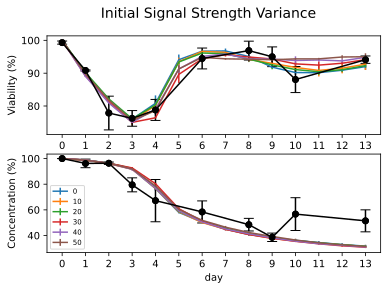

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbSigInitStd"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Initial Signal Strength Variance', fontsize=14)

groups = df.groupby(['gui-sig-init-std', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbSigInitStd.svg")
files.download("PerturbSigInitStd.svg") 

### Movement Probability of Need Signal B-CLL

In [ ]:
## import varying Movement Probability of Need Signal B-CLL
uploaded = files.upload()

Saving PerturbNeedSigMov.csv to PerturbNeedSigMov.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

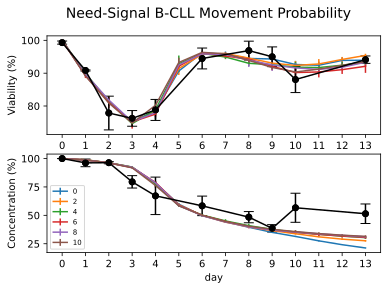

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbNeedSigMov"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Need-Signal B-CLL Movement Probability', fontsize=14)

groups = df.groupby(['gui-need-sig-mov', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbNeedSigMov.svg")
files.download("PerturbNeedSigMov.svg") 

### Movement Probability of Apoptotic B-CLL

In [ ]:
## import varying Movement Probability of Apoptotic B-CLL
uploaded = files.upload()

Saving PerturbApoMov.csv to PerturbApoMov.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

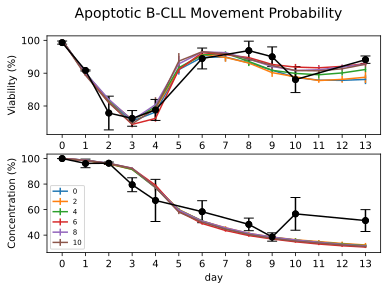

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbApoMov"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Apoptotic B-CLL Movement Probability', fontsize=14)

groups = df.groupby(['gui-apo-mov', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbApoMov.svg")
files.download("PerturbApoMov.svg") 

### Macro-kill-eff

In [ ]:
## import Irreversible NLC Polarization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbM2KillEff.csv to PerturbM2KillEff.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

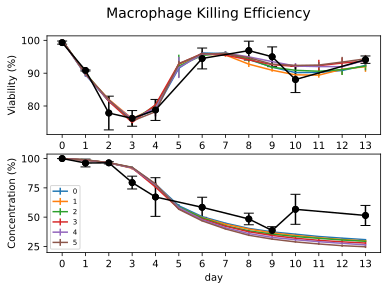

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbM2KillEff"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Macrophage Killing Efficiency', fontsize=14)

groups = df.groupby(['gui-M2-kill-eff', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbM2KillEff.svg")
files.download("PerturbM2KillEff.svg") 

###Layers-around-NLC

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbLayersUpTo5.csv to PerturbLayersUpTo5.csv


[]

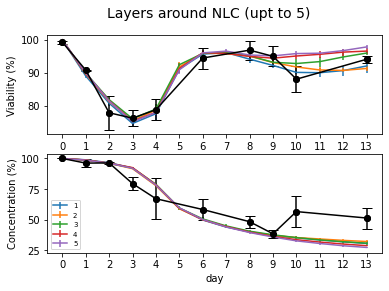

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbLayersUpTo5"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')
# set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Layers around NLC (upt to 5)', fontsize=14)

groups = df.groupby(['gui-layers', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
# plt.savefig("PerturbLayers.svg")
# files.download("PerturbLayers.svg") 

###CLL-sensing-distance

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbCLLSensDist.csv to PerturbCLLSensDist.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

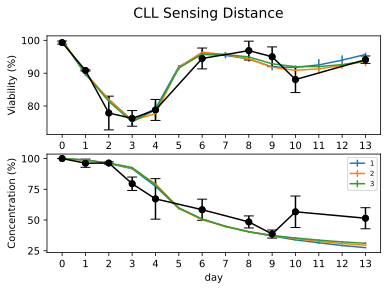

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbCLLSensDist"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('CLL Sensing Distance', fontsize=14)

groups = df.groupby(['gui-cll-sens-dist', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbCLLSensDist.svg")
files.download("PerturbCLLSensDist.svg") 

###Monocyte-sensing-distance

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbMonoSensDist.csv to PerturbMonoSensDist.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

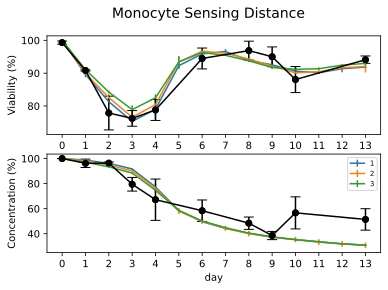

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbMonoSensDist"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Monocyte Sensing Distance', fontsize=14)

groups = df.groupby(['gui-mono-sens-dist', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbMonoSensDist.svg")
files.download("PerturbMonoSensDist.svg") 

###NLC-sensing-distance

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbNLCSensDist.csv to PerturbNLCSensDist.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

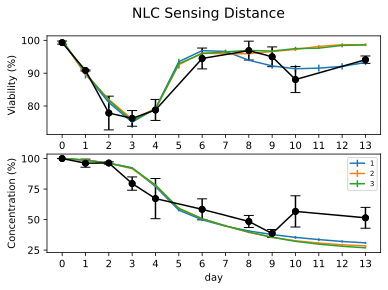

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbNLCSensDist"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('NLC Sensing Distance', fontsize=14)

groups = df.groupby(['gui-nlc-sens-dist', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbNLCSensDist.svg")
files.download("PerturbNLCSensDist.svg") 

###Macro-sensing-distance

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving PerturbMacroSensDist.csv to PerturbMacroSensDist.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

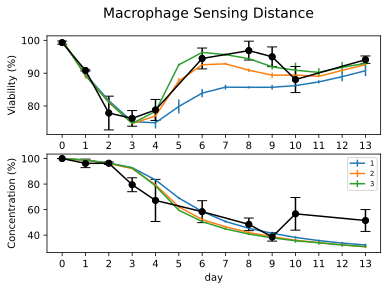

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbMacroSensDist"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Macrophage Sensing Distance', fontsize=14)

groups = df.groupby(['gui-macro-sens-dist', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()
plt.savefig("PerturbMacroSensDist.svg")
files.download("PerturbMacroSensDist.svg") 

### Irreversible NLC polarization

In [ ]:
## import Irreversible NLC Polarization
uploaded = files.upload()

Saving PerturbIrreversibleNLCconversion.csv to PerturbIrreversibleNLCconversion.csv


              1           3           4  ...           6           7           8
0    100.000000  100.000000  100.000000  ...  100.000000  100.000000  100.000000
24    89.540493   90.121581   88.748420  ...   89.546950   89.296559   89.116679
48    81.886891   82.447498   80.379912  ...   81.175247   80.888081   80.767237
72    75.441456   76.001082   76.098370  ...   75.324675   74.018945   74.919181
96    78.598726   81.280310   81.555334  ...   77.738965   78.067633   79.054054
120   92.475830   92.625000   93.940696  ...   90.346535   92.337495   94.051724
144   95.510607   96.679881   96.387356  ...   93.762183   97.381930   96.696697
168   95.950506   95.522388   96.380090  ...   95.705521   96.461187   96.494157
192   94.602978   94.627595   93.980344  ...   96.144279   95.375000   95.407226
216   93.142477   91.124260   90.909091  ...   93.186373   92.255892   92.875817
240   91.478873   90.216632   89.196676  ...   91.643059   91.589451   90.972222
264   92.542878   91.116006 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

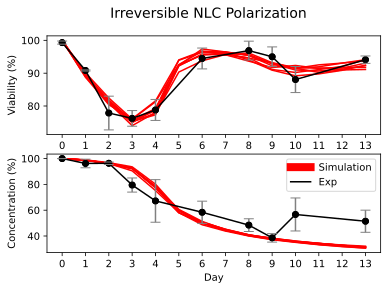

In [ ]:
## plot simulations vs experimental data
file_name = "PerturbIrreversibleNLCconversion"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
# set_matplotlib_formats('png')

viability_dict, remaining_dict= {}, {}
with open("%s.csv" % file_name, 'r') as file_read :
  data = file_read.readlines()
  for line in data[7:] :
    line = line.replace('\"', '').split(',')
    run_number = int(line[0])
    step = int(line[1])
    viability = float(line[3])
    remainingCellRatio = float(line[4])
    if run_number not in viability_dict :
      viability_dict[run_number] = []
    viability_dict[run_number].append(viability)
    if run_number not in remaining_dict :
      remaining_dict[run_number] = []
    remaining_dict[run_number].append(remainingCellRatio)	

df_viability = pd.DataFrame.from_dict(viability_dict) #  orient='index')
df_remaining = pd.DataFrame.from_dict(remaining_dict)

my_list = [0,24,24*2,24*3,24*4,24*5,24*6,24*7,24*8,24*9,24*10,24*11,24*12,24*13]

filtered_df_viability = df_viability[df_viability.index.isin(my_list)]
print(filtered_df_viability)
filtered_df_remaining = df_remaining[df_remaining.index.isin(my_list)]

#### make separate plots
# filtered_df_viability.plot(title='Viability',legend=False, ylim=(80,100))
# filtered_df_remaining.plot(title='Remaining Cells', legend=False, ylim=(30,110))

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Irreversible NLC Polarization', fontsize=14)

filtered_df_viability.plot(ax=axes[0],legend=False, color='r', zorder=0)#, ylim=(00,100), color='orange')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))

filtered_df_remaining.plot(ax=axes[1], legend=False, color='r', zorder=0)#, ylim=(00,110), color='orange')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length' )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'grey', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp')
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'grey', fmt='none', capsize = 5)

# https://github.com/matplotlib/matplotlib/issues/8807
leg = axes[1].legend(['Simulation', 'Exp'])#, loc='upper right', bbox_to_anchor=(1.3,1.3), )


LH = leg.legendHandles
LH[0].set_linewidth(8)  # Works
LH[1].set_color('black') # No change
# LH[2].set_ms(15)    # No change
# LH[3].set_marker('*')  # Stars added to left and right!
# LH[3].set_color('r')   # Stars now change color
# LH[4].set_color('w')   # No change
# LH[5].set_alpha(0.5)  # Well-behaved scatter

# plt.show()
plt.plot()

## calculate the mean values from several simulations for viability
mean_via_simu = filtered_df_viability.mean(axis=1).transpose()
# print(mean_via_simu)
mean_via_exp = pd.DataFrame(data=viability_means_array, index=mean_via_simu.index).transpose()
# print(mean_via_exp)
via_errors = (mean_via_simu - mean_via_exp).transpose()
# print(via_errors)
via_errors2 = via_errors * via_errors
# print(via_errors2[0])
sum_via_errors = via_errors2[0].sum()
print("Delta Fitness Via for %s = %s" % (file_name,sum_via_errors))

## calculate the mean values from several simulations for concentration
mean_conc_simu = filtered_df_remaining.mean(axis=1).transpose()
mean_conc_exp = pd.DataFrame(data=concentration_means_array, index=mean_conc_simu.index).transpose()
conc_errors = (mean_conc_simu - mean_conc_exp).transpose()
conc_errors2 = conc_errors * conc_errors
sum_conc_errors = conc_errors2[0].sum()
print("Delta Fitness Conc for %s = %s" % (file_name,sum_conc_errors))

plt.savefig("PerturbIrreversibleNLCconversion.svg")
files.download("PerturbIrreversibleNLCconversion.svg") 

In [ ]:
## import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving 15_MacroSensDist.csv to 15_MacroSensDist.csv


[]

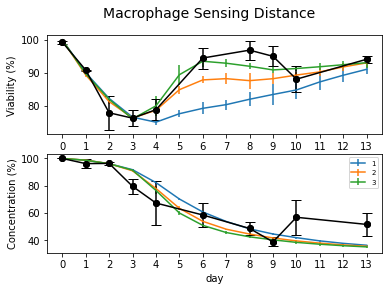

In [ ]:
## plot simulations vs experimental data
file_name = "15_MacroSensDist"
import pandas as pd
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

df = pd.read_csv("%s.csv" % file_name, skiprows = 6)

df.sort_values(by=['[step]'])
df = df[df["[step]"]%24 == 0]

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Macrophage Sensing Distance', fontsize=14)

groups = df.groupby(['gui-macro-sens-dist', '[step]']).agg(['mean', 'std'])

viability = groups["getViability"].unstack(0)
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Viability (%)')
axes[0].set_xticks(range(0,25*13, 24))
axes[0].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
viability.plot(None, 'mean', yerr='std', ax=axes[0], legend=False)

concentration = groups["getRemainingCellRatio"].unstack(0)
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Concentration (%)')
axes[1].set_xticks(range(0,25*13, 24))
axes[1].set_xticklabels(range(0,14))
# axes[0].axis(ymin=40,ymax=100)
concentration.plot(None, 'mean', yerr='std', ax=axes[1], legend=True)

x_axis = axes[1].axes.get_xaxis()
x_axis.set_label_text('day')
# x_label = x_axis.get_label()
# ##print isinstance(x_label, matplotlib.artist.Artist)
# x_label.set_visible(False)

# axes[0].legend(loc='lower right', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )
axes[1].legend(loc='best', prop={'size': 7})#, bbox_to_anchor=(1.3,1.3), )

# ### add the mean experimental
viability = np.genfromtxt("patientsData.tsv", delimiter='\t', names=True)
viability_means_array = np.array(viability_means, dtype=np.float)
viability_mask = np.isfinite(viability_means_array)
axes[0].plot (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], linestyle='-', marker='o', color='black', label='Model length', zorder=10 )
axes[0].scatter (viability['Day'][viability_mask]*24, viability_means_array[viability_mask], facecolors ='black', edgecolors='black')
axes[0].errorbar(viability['Day']*24, viability_means_array, viability_err, ecolor = 'black', fmt='none', capsize = 5)
# axes[0].axis(ymin=40,ymax=100)

concentration = np.genfromtxt("patientsDataConc.tsv", delimiter='\t', names=True)
concentration_means_array = np.array(concentration_means, dtype=np.float)
concentration_mask = np.isfinite(concentration_means_array)
axes[1].plot (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], linestyle='-', marker='o', color='black', label='Exp', zorder=10)
axes[1].scatter (concentration['Time'][concentration_mask]*24, concentration_means_array[concentration_mask], facecolors ='black', edgecolors='black')
axes[1].errorbar(concentration['Time']*24, concentration_means, concentration_err, ecolor = 'black', fmt='none', capsize = 5)

plt.plot()

## Predictions

### Import patients prediction data

In [ ]:
# import patients data for varying initial monocytes proportions
from google.colab import files
uploaded = files.upload()

Saving prediction-via-exp.tsv to prediction-via-exp.tsv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving prediction-conc-exp.tsv to prediction-conc-exp.tsv


### Plot patients independently

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

predicted_via = np.genfromtxt("prediction-via-exp.tsv", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-conc-exp.tsv", delimiter='\t', names=True)

predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print([str(x) for x in predicted_via['mono']])

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)

plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])

axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient1'], facecolors ='none', edgecolors='r')
axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient2'], facecolors ='none', edgecolors='g')  
axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient3'], facecolors ='none', edgecolors='b')  
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient1'], facecolors ='none', edgecolors='r')
axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient2'], facecolors ='none', edgecolors='g')  
axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient3'], facecolors ='none', edgecolors='b')  
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')




axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))

plt.show()

<Figure size 432x288 with 2 Axes>

##### as lines

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

predicted_via = np.genfromtxt("prediction-via-exp.tsv", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-conc-exp.tsv", delimiter='\t', names=True)

predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print([str(x) for x in predicted_via['mono']])

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)

plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])

axs[0].plot ([str(x) for x in predicted_via['mono']], predicted_via['Patient1'], linestyle='-', marker='o', color='r')
axs[0].plot ([str(x) for x in predicted_via['mono']], predicted_via['Patient2'], linestyle='-', marker='o', color='g')  
axs[0].plot ([str(x) for x in predicted_via['mono']], predicted_via['Patient3'], linestyle='-', marker='o', color='b')  
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].plot ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient1'], linestyle='-', marker='o', color='r')
axs[1].plot ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient2'], linestyle='-', marker='o', color='g')  
axs[1].plot ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient3'], linestyle='-', marker='o', color='b')  
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

plt.xticks(rotation=45)



axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))

plt.show()

<Figure size 432x288 with 2 Axes>

####joining dots

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

predicted_via = np.genfromtxt("prediction-via-exp.tsv", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-conc-exp.tsv", delimiter='\t', names=True)

predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print([str(x) for x in predicted_via['mono']])

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)

plt.xticks(range(len([str(x) for x in predicted_conc['mono']])), [str(x) for x in predicted_via['mono']])



patient1mask = np.isfinite(predicted_via['Patient1'])
patient2mask = np.isfinite(predicted_via['Patient2'])
patient3mask = np.isfinite(predicted_via['Patient3'])

axs[0].plot (predicted_via['mono'][patient1mask], predicted_via['Patient1'][patient1mask], linestyle='-', marker='o', color='r')
axs[0].plot (predicted_via['mono'][patient2mask], predicted_via['Patient2'][patient2mask], linestyle='-', marker='o', color='g')
axs[0].plot (predicted_via['mono'][patient3mask], predicted_via['Patient3'][patient3mask], linestyle='-', marker='o', color='b')

## does not work, it binds dots not in numerical order anymore
# axs[0].plot ([str(x) for x in predicted_via['mono'][patient1mask]], predicted_via['Patient1'][patient1mask], linestyle='-', marker='o', color='r')
# axs[0].plot ([str(x) for x in predicted_via['mono'][patient2mask]], predicted_via['Patient2'][patient2mask], linestyle='-', marker='o', color='g')
# axs[0].plot ([str(x) for x in predicted_via['mono'][patient3mask]], predicted_via['Patient3'][patient3mask], linestyle='-', marker='o', color='b')

# axs[0].xaxis.set_ticklabels(predicted_via['mono']) # change the ticks' names to x

# axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

patient1maskc = np.isfinite(predicted_conc['Patient1'])
patient2maskc = np.isfinite(predicted_conc['Patient2'])
patient3maskc = np.isfinite(predicted_conc['Patient3'])
# print(patient1maskc)

axs[1].plot (predicted_conc['mono'][patient1maskc], predicted_conc['Patient1'][patient1maskc], linestyle='-', marker='o', color='r')
axs[1].plot (predicted_conc['mono'][patient2maskc], predicted_conc['Patient2'][patient2maskc], linestyle='-', marker='o', color='g')
axs[1].plot (predicted_conc['mono'][patient3maskc], predicted_conc['Patient3'][patient3maskc], linestyle='-', marker='o', color='b')

# axs[1].xaxis.set_ticklabels(predicted_conc['mono']) # change the ticks' names to x

axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')




axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))

plt.show()

<Figure size 432x288 with 2 Axes>

In [ ]:
# build the means/std arrays, ignoring nan values
predicted_via_means, predicted_via_err = [None] * len(predicted_via), [None] * len(predicted_via)
# print(len(predicted_via))
for i in range(0, len(predicted_via)) :  
  # print(i)
  if [predicted_via[i][1], predicted_via[i][2], predicted_via[i][3]] == [float("nan"),float("nan"),float("nan")] :
    mean = float("nan")
    std = float("nan")
  else :
    mean = np.nanmean([predicted_via[i][1], predicted_via[i][2], predicted_via[i][3]], dtype=np.float64)
    std = np.nanstd([predicted_via[i][1], predicted_via[i][2], predicted_via[i][3]], dtype=np.float64)
  predicted_via_means[i] = mean
  predicted_via_err[i] = std
print(predicted_via_means)


predicted_conc_means, predicted_conc_err = [None] * len(predicted_conc), [None] * len(predicted_conc)
for i in range(0, len(predicted_conc)) :
  if [predicted_conc[i][1], predicted_conc[i][2], predicted_conc[i][3]] == [float("nan"),float("nan"),float("nan")] :
    mean = float("nan")
    std = float("nan")
  else :
    mean = np.nanmean([predicted_conc[i][1], predicted_conc[i][2], predicted_conc[i][3]], dtype=np.float64)
    std = np.nanstd([predicted_conc[i][1], predicted_conc[i][2], predicted_conc[i][3]], dtype=np.float64)
  predicted_conc_means[i] = mean
  predicted_conc_err[i] = std
print(predicted_conc_means)


[36.5, 16.0, 32.0, 43.833333333333336, 47.5, 49.0, 50.5, 72.17333333333333, 81.66666666666667, 90.33333333333333, 96.0, 96.5, 98.16666666666667, 99.0]
[100.0, 89.5522388059701, 100.142959256612, 101.70069357762077, 90.3025970931618, 93.6635621037059, 86.94364726285187, 80.17578298642597, 61.84078416589913, 43.764024765379666, 38.12507631013387, 44.02985074626865, 35.69198325740843, 29.5449130331189]


In [ ]:
# plot the means as dots with error bars
# fig, ax = plt.subplots()
fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions (3 patients)', fontsize=14)


plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])

axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via_means, facecolors ='black', edgecolors='black')
axs[0].errorbar([str(x) for x in predicted_via['mono']], predicted_via_means, predicted_via_err, ecolor = 'black', fmt='none', capsize = 5)
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc_means, facecolors ='black', edgecolors='black')
axs[1].errorbar([str(x) for x in predicted_conc['mono']], predicted_conc_means, predicted_conc_err, ecolor = 'black', fmt='none', capsize = 5)
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

plt.plot()

[]

<Figure size 432x288 with 2 Axes>

In [ ]:
fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions (3 patients)', fontsize=14)


plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])

axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient1'], facecolors ='none', edgecolors='r')
axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient2'], facecolors ='none', edgecolors='g')  
axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via['Patient3'], facecolors ='none', edgecolors='b')  

axs[0].scatter ([str(x) for x in predicted_via['mono']], predicted_via_means, facecolors ='black', edgecolors='black')
axs[0].errorbar([str(x) for x in predicted_via['mono']], predicted_via_means, predicted_via_err, ecolor = 'black', fmt='none', capsize = 5)
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient1'], facecolors ='none', edgecolors='r')
axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient2'], facecolors ='none', edgecolors='g')  
axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc['Patient3'], facecolors ='none', edgecolors='b')  

axs[1].scatter ([str(x) for x in predicted_conc['mono']], predicted_conc_means, facecolors ='black', edgecolors='black')
axs[1].errorbar([str(x) for x in predicted_conc['mono']], predicted_conc_means, predicted_conc_err, ecolor = 'black', fmt='none', capsize = 5)
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))

plt.plot()

[]

<Figure size 432x288 with 2 Axes>

#### Plot patients intra-variability

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

predicted_via = np.genfromtxt("prediction-exp-via.txt", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-exp-conc.txt", delimiter='\t', names=True)
print(predicted_via)
predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print([str(x) for x in predicted_via['mono']])

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)
print(predicted_via.dtype.names)
plt.xticks(range(len([str(x) for x in predicted_via['Initial_monocyte_']])), [str(x) for x in predicted_via['Initial_monocyte_']])

axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[0].scatter ([str(x) for x in predicted_via['Initial_monocyte_']], predicted_via['Exp5_DH'], facecolors ='none', edgecolors='b')  
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[1].scatter ([str(x) for x in predicted_conc['Initial_monocyte_']], predicted_conc['Exp5_DH'], facecolors ='none', edgecolors='b')  
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))
leg = axs[1].get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('blue')
plt.show()

OSError: ignored

#### with a linear x-axis scale

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

predicted_via = np.genfromtxt("prediction-exp-via.txt", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-exp-conc.txt", delimiter='\t', names=True)
print(predicted_via)
predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print([str(x) for x in predicted_via['mono']])

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)
print(predicted_via.dtype.names)
# plt.xticks(range(len([str(x) for x in predicted_via['Initial_monocyte_']])), [str(x) for x in predicted_via['Initial_monocyte_']])

axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp5_DH'], facecolors ='none', edgecolors='b')  
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp5_DH'], facecolors ='none', edgecolors='b')  
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend(['Patient1','Patient2','Patient3'])#, loc='upper right', bbox_to_anchor=(1.25,1.3))
leg = axs[1].get_legend()
leg.legendHandles[0].set_color('red')
leg.legendHandles[1].set_color('green')
leg.legendHandles[2].set_color('blue')
plt.show()

OSError: ignored

#### zoom in the smaller values

In [ ]:
predicted_via = np.genfromtxt("prediction-exp-via.txt", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-exp-conc.txt", delimiter='\t', names=True)
print(predicted_via)
predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)
fig, axs = plt.subplots(2,1)
# fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions', fontsize=14)
print(predicted_via.dtype.names)
# plt.xticks(range(len([str(x) for x in predicted_via['Initial_monocyte_']])), [str(x) for x in predicted_via['Initial_monocyte_']])
# print(predicted_via)
predicted_via = predicted_via[:-6]
predicted_conc = predicted_conc[:-6]

# print(predicted_via)

axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[0].scatter (predicted_via['Initial_monocyte_'], predicted_via['Exp5_DH'], facecolors ='none', edgecolors='b')  
# axs[0].set_xlabel('Monocytes Initial Proportion')
# axs[0].set_ylabel('Viability (%)')

axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp2_DA'], facecolors ='none', edgecolors='r')
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp2_DB'], facecolors ='none', edgecolors='r')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp3_DC'], facecolors ='none', edgecolors='g')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp3_DD'], facecolors ='none', edgecolors='g')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp5_DG'], facecolors ='none', edgecolors='b')  
axs[1].scatter (predicted_conc['Initial_monocyte_'], predicted_conc['Exp5_DH'], facecolors ='none', edgecolors='b')  
# axs[1].set_xlabel('Monocytes Initial Proportion')
# axs[1].set_ylabel('Concentration (%)')


OSError: ignored

### Averaged bars

[]

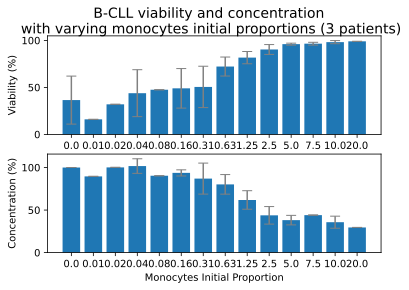

In [ ]:
## barplot with error bars

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions (3 patients)', fontsize=14)


plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])

axs[0].bar ([str(x) for x in predicted_via['mono']], predicted_via_means)#, facecolors ='black', edgecolors='black')
axs[0].errorbar([str(x) for x in predicted_via['mono']], predicted_via_means, predicted_via_err, ecolor = 'grey', fmt='none', capsize = 5)
axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')

axs[1].bar ([str(x) for x in predicted_conc['mono']], predicted_conc_means)#, facecolors ='black', edgecolors='black')
axs[1].errorbar([str(x) for x in predicted_conc['mono']], predicted_conc_means, predicted_conc_err, ecolor = 'grey', fmt='none', capsize = 5)
axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Concentration (%)')

plt.plot()

### Barplots : 3 series 

#### with pandas

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

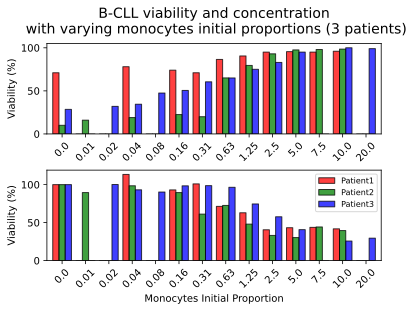

In [ ]:
import pandas as pd
from IPython.display import set_matplotlib_formats

# set_matplotlib_formats('png')
set_matplotlib_formats('svg')

predicted_via = np.genfromtxt("prediction-via-exp.tsv", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-conc-exp.tsv", delimiter='\t', names=True)

predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)



fig, axs = plt.subplots(2,1)#, figsize=(7, 7))
axs[0].set_title('B-CLL viability and concentration\n with varying monocytes initial proportions (3 patients)', fontsize=14,pad=10)


plt.xticks(range(len([str(x) for x in predicted_via['mono']])), [str(x) for x in predicted_via['mono']])


axs[0].set_ylabel('Viability (%)')
patient1via = predicted_via['Patient1']
patient2via = predicted_via['Patient2']
patient3via = predicted_via['Patient3']
index_via = [str(x) for x in predicted_via['mono']]
df_via = pd.DataFrame({'Patient1': patient1via, 'Patient2': patient2via, 'Patient3': patient3via}, index=index_via)
df_via.plot.bar(ax=axs[0], rot=45, legend=False, width=0.8, color=['r','g','b'],alpha=0.75, edgecolor='black')

axs[1].set_xlabel('Monocytes Initial Proportion')
axs[1].set_ylabel('Viability (%)')
patient1conc = predicted_conc['Patient1']
patient2conc = predicted_conc['Patient2']
patient3conc = predicted_conc['Patient3']
index_conc = [str(x) for x in predicted_conc['mono']]
df_conc = pd.DataFrame({'Patient1': patient1conc, 'Patient2': patient2conc, 'Patient3': patient3conc}, index=index_conc)
df_conc.plot.bar(ax=axs[1], rot=45, width=0.8, color=['r','g','b'], alpha=0.75, edgecolor='black')

plt.legend(prop={'size': 8})

# set the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# fig.tight_layout() 
plt.savefig("pred_patients_data.svg")
files.download("pred_patients_data.svg") 

#### with numpy only

In [ ]:
### plot differently the 3 series of barplots

from IPython.display import set_matplotlib_formats

# set_matplotlib_formats('png')
# set_matplotlib_formats('svg')
set_matplotlib_formats('pdf')


predicted_via = np.genfromtxt("prediction-via-exp.tsv", delimiter='\t', names=True)
predicted_conc = np.genfromtxt("prediction-conc-exp.tsv", delimiter='\t', names=True)

predicted_via = np.flip(predicted_via)
predicted_conc = np.flip(predicted_conc)

# print(predicted_via)


# ## create lists for the plot
patient1via = predicted_via['Patient1']
patient2via = predicted_via['Patient2']
patient3via = predicted_via['Patient3']

patient1conc = predicted_conc['Patient1']
patient2conc = predicted_conc['Patient2']
patient3conc = predicted_conc['Patient3']

# print(type(predicted_via))

monoInitList = []
for series in predicted_via :
	monoInitList.append(series[0])
Monocyte_initial_proportion = np.array(monoInitList)



# ## add them to the patients bar plot.
# # https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

fig, axs = plt.subplots(2,1)
fig.suptitle('B-CLL survival in heterologous co-cultures (day 9)', fontsize=12, y=0.95)
x_labels = [str(x) for x in predicted_via['mono']]
plt.xticks(range(len(x_labels)), x_labels, fontsize=8)

x = np.arange(len(x_labels))  # the label locations
width = 1   # the width of the bars

axs[0].bar (x - width/4, patient1via, width/4, color='red', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient1')
axs[0].bar (x, patient2via, width/4, color='green', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient2')
axs[0].bar (x + width/4, patient3via, width/4, color='blue', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient3')
# axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')


plt.sca(axs[0])
plt.xticks(range(len(x_labels)), x_labels, fontsize=8)
axs[1].bar (x - width/4, patient1conc, width/4, color='red', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient1')
axs[1].bar (x, patient2conc, width/4, color='green', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient2')
axs[1].bar (x + width/4, patient3conc, width/4, color='blue', edgecolor='black', alpha=0.75,linewidth=0.5, label='Patient3')
axs[1].set_xlabel('Monocytes Initial Proportion (%)')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend()#loc='upper right', bbox_to_anchor=(1.3,1.3))



plt.savefig("B-CLL survival in heterologous co-cultures (day 9).pdf")
files.download("B-CLL survival in heterologous co-cultures (day 9).pdf") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 2 Axes>

### Add simulations for prediction

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pred.csv to pred.csv


In [ ]:
### parse the results to get means and errors for each monocytes initial proportion

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics 
from google.colab import files
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf')
# set_matplotlib_formats('svg')



with open("pred.csv", 'r') as file_read :
	data = file_read.readlines()
	myViabilityDict = {}
	myremainingCellRatioDict = {}
	for line in data[7:] :
		line = line.replace("\"","").split(",")
		monoInit = float(line[1])
		viability = float(line[4])
		remainingCellRatio = float(line[5])
		if monoInit not in myViabilityDict :
			myViabilityDict[monoInit] = [viability]
		else :
			myViabilityDict[monoInit].append(viability)
		if monoInit not in myremainingCellRatioDict :
			myremainingCellRatioDict[monoInit] = [remainingCellRatio]
		else :
			myremainingCellRatioDict[monoInit].append(remainingCellRatio)

myViabilityDict = dict((sorted(myViabilityDict.items())))
myremainingCellRatioDict = dict((sorted(myremainingCellRatioDict.items())))

### calculate the means
myViabilityMeans = {}
for monoInit in myViabilityDict :
	meanViability = statistics.mean(myViabilityDict[monoInit])
	myViabilityMeans[monoInit] = meanViability

myConcentrationMeans = {}
for monoInit in myremainingCellRatioDict :
	meanConcentration = statistics.mean(myremainingCellRatioDict[monoInit])
	myConcentrationMeans[monoInit] = meanConcentration

### calculate the stderrors
myViabilitystd = {}
for monoInit in myViabilityDict :
	stdViability = statistics.stdev(myViabilityDict[monoInit])
	myViabilitystd[monoInit] = stdViability

myConcentrationstd = {}
for monoInit in myremainingCellRatioDict :
	stdConcentration = statistics.stdev(myremainingCellRatioDict[monoInit])
	myConcentrationstd[monoInit] = stdConcentration

## create lists for the plot
monoInitList = []
viabilityMeanList, viabilityStdList = [], []
for monoInit in myViabilityDict :
	monoInitList.append(monoInit)
	viabilityMeanList.append(myViabilityMeans[monoInit])
	viabilityStdList.append(myViabilitystd[monoInit])

concentrationMeanList, concentrationStdList = [], []
for monoInit in myremainingCellRatioDict :
  # print(monoInit)
  concentrationMeanList.append(myConcentrationMeans[monoInit])
  concentrationStdList.append(myConcentrationstd[monoInit])

Monocyte_initial_proportion = np.array(monoInitList)
x_pos = np.arange(len(Monocyte_initial_proportion))

viability_mean = np.array(viabilityMeanList)
viability_std = np.array(viabilityStdList)

concentration_mean = np.array(concentrationMeanList)
concentration_std = np.array(concentrationStdList)

# print(viability_mean)
# print(viability_std)

viability_mean = list(viability_mean)
viability_std = list(viability_std)
concentration_mean = list(concentration_mean)
concentration_std = list(concentration_std)

## add them to the patients bar plot.
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

fig, axs = plt.subplots(2,1)
# fig.suptitle('B-CLL viability and concentration\n with varying monocytes initial proportions (3 patients)\n Experimental vs. Predictions', fontsize=10, y=1.02)
fig.suptitle('Model Predictions', fontsize=10, y=1.02)
x_labels = [str(x) for x in predicted_via['mono']]
plt.xticks(range(len(x_labels)), x_labels, fontsize=8)

x = np.arange(len(x_labels))  # the label locations
width = 0.4  # the width of the bars

axs[0].bar (x - width/2, predicted_via_means, width, color=['black']*len(x_labels), label='Exp')
axs[0].errorbar(x - width/2, predicted_via_means, predicted_via_err, ecolor = 'grey', fmt='none', capsize = 2)
axs[0].bar (x + width/2, viability_mean, width, color=['red']*len(x_labels), label='Prediction')
axs[0].errorbar(x + width/2, viability_mean, viability_std, ecolor = 'grey', fmt='none', capsize = 2)
# axs[0].set_xlabel('Monocytes Initial Proportion')
axs[0].set_ylabel('Viability (%)')


plt.sca(axs[0])
plt.xticks(range(len(x_labels)), x_labels, fontsize=8)
axs[1].bar (x - width/2, predicted_conc_means, width, color=['black']*len(x_labels), label='Exp')
axs[1].errorbar(x - width/2, predicted_conc_means, predicted_conc_err, ecolor = 'grey', fmt='none', capsize = 2)
axs[1].bar (x + width/2, concentration_mean, width, color=['red']*len(x_labels), label='Prediction')
axs[1].errorbar(x + width/2, concentration_mean, concentration_std, ecolor = 'grey', fmt='none', capsize = 2)
axs[1].set_xlabel('Monocytes Initial Proportion (%)')
axs[1].set_ylabel('Concentration (%)')

axs[1].legend()#loc='upper right', bbox_to_anchor=(1.3,1.3))



plt.plot()
plt.savefig("pred.pdf")
files.download("pred.pdf") 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 2 Axes>